# Areal Project

<div>
<img src="logo.jpg", width=150, ALIGN="left", border=20>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
    <p>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, New challenges in remote sensing impose the necessity of designing
pixel classification methods that, once trained on a certain dataset, generalize to other areas of the earth.
In this challenge, we will thus design pixel classification methods on areas.  The goal is to find urban areas in the Areal dataset. Areal Dataset is a small data set created from the <a href="https://project.inria.fr/aerialimagelabeling/">Inria Aerial Image Labeling Dataset</a>. The data set contains covers a wide range of urban settlement appearances from 5 differents cities of different geographic locations. The data set is divided into 3 parts : training set, validation set and test set.

References and credits: 
Emmanuel Maggiori, Yuliya Tarabalka, Guillaume Charpiat, Pierre Alliez.
</div>

In [18]:
import numpy as np
import random
from sample_code_submission.model import AlexNetModel
import re

In [19]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [20]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [21]:
data_dir = 'sample_data'
data_name = 'Areal'

In [22]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 196608
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [23]:
# print(data.head(1))
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B,target
0,34,31,26,28,25,20,26,23,18,28,...,61,66,44,59,64,42,66,71,49,beach
1,173,143,119,171,141,117,160,133,106,190,...,31,42,48,31,42,48,31,42,48,beach
2,203,201,180,203,201,180,203,201,180,203,...,108,125,115,82,99,89,93,110,100,beach
3,31,62,57,31,62,57,32,63,58,32,...,65,85,84,71,91,90,75,95,94,beach
4,126,127,109,125,126,108,122,123,105,121,...,82,98,88,93,106,97,109,122,113,beach


In [7]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_253_B,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,98.369231,101.030769,90.292308,97.738462,100.446154,89.800000,97.353846,99.984615,89.723077,96.553846,...,92.707692,101.138462,103.969231,92.769231,101.846154,104.615385,93.523077,102.769231,105.615385,94.430769
std,56.011597,47.561135,47.148609,55.206792,46.557099,45.764752,54.945834,46.020204,43.407051,56.168004,...,54.974631,62.253985,56.830881,57.444748,61.562273,56.380042,57.053732,60.437149,55.825815,56.069145
min,20.000000,18.000000,15.000000,23.000000,20.000000,14.000000,21.000000,16.000000,10.000000,18.000000,...,14.000000,11.000000,11.000000,11.000000,14.000000,12.000000,9.000000,15.000000,13.000000,4.000000
25%,45.000000,70.000000,51.000000,53.000000,69.000000,51.000000,57.000000,73.000000,56.000000,44.000000,...,51.000000,52.000000,62.000000,46.000000,54.000000,60.000000,48.000000,57.000000,65.000000,50.000000
50%,84.000000,95.000000,92.000000,85.000000,95.000000,83.000000,85.000000,96.000000,82.000000,89.000000,...,84.000000,88.000000,96.000000,86.000000,93.000000,100.000000,86.000000,101.000000,101.000000,85.000000
75%,142.000000,140.000000,129.000000,144.000000,133.000000,132.000000,136.000000,133.000000,125.000000,141.000000,...,119.000000,136.000000,135.000000,124.000000,140.000000,130.000000,121.000000,139.000000,124.000000,120.000000
max,206.000000,194.000000,176.000000,206.000000,193.000000,173.000000,206.000000,193.000000,172.000000,207.000000,...,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,254.000000,255.000000,255.000000


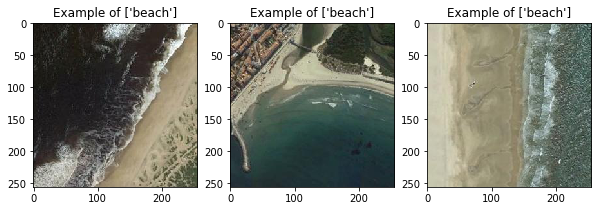

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 3
fig, _axs = plt.subplots(nrows=1, ncols=num_toshow, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.values[i][:-1].reshape(256,256,3)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [25]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0       beach
1       beach
2       beach
3       beach
4       beach
5   chaparral
6   chaparral
7   chaparral
8   chaparral
9   chaparral
10      cloud
11      cloud
12      cloud
13      cloud
14      cloud
15     desert
16     desert
17     desert
18     desert
19     desert
20     forest
21     forest
22     forest
23     forest
24     forest
25     island
26     island
27     island
28     island
29     island
..        ...
35     meadow
36     meadow
37     meadow
38     meadow
39     meadow
40   mountain
41   mountain
42   mountain
43   mountain
44   mountain
45      river
46      river
47      river
48      river
49      river
50        sea
51        sea
52        sea
53        sea
54        sea
55   snowberg
56   snowberg
57   snowberg
58   snowberg
59   snowberg
60    wetland
61    wetland
62    wetland
63    wetland
64    wetland

[65 rows x 1 columns]


# Step 2 : Building a predictive model

In [26]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/biard/Documents/université/m2/s1/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 196608
	target_num = 13
	label_num = 13
	train_num = 65
	valid_num = 13
	test_num = 0
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(65, 196608)
	Y_train = array(65, 1)
	X_valid = array(13, 196608)
	Y_valid = array(13, 1)
	X_test = array(13, 196608)
	Y_test = array(13, 1)
feat_type:	array(196608,)
feat_idx:	array(0,)



In [27]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [28]:
m = AlexNetModel(verbose=True, use_cuda=False)
trained_model_name = model_dir + data_name

In [29]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.757339
Epoch 1 : loss = 2.482452
Epoch 2 : loss = 2.217841
Epoch 3 : loss = 1.994824
Epoch 4 : loss = 1.891037
Epoch 5 : loss = 1.752420
Epoch 6 : loss = 1.610046
Epoch 7 : loss = 1.461972
Epoch 8 : loss = 1.262576
Epoch 9 : loss = 1.160084


In [33]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [36]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring the result

In [37]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [38]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy metric = 0.2769
Ideal score for the accuracy metric = 1.0000


## confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0],
       [0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0]])

In [11]:
# test = np.random.rand(10,3*256*256)
# pred = m.predict(test)

In [12]:
# print(pred)
# print(pred.shape)
# print(test.shape[0] * test.shape[-2] * test.shape[-1])

['lake' 'lake' 'lake' 'mountain' 'beach' 'lake' 'beach' 'lake' 'mountain'
 'lake']
(10,)
19660800
